# Ambiguous map patterns from stratigraphy

In [1]:
#some imports, using verde to grid
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import verde as vd
%matplotlib inline

## Here we make some data with angular unconformity and onlap

In [2]:
names = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven',
         'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen'] #this creates dummy names for the formations
number_of_layers = 6 #this is the number of tops you want in your training data

#this section builds some toy data with an angular unconformity

df =  pd.DataFrame()
for j in np.arange(-5,7,2):
    rolling = pd.DataFrame()
    rolling['zero'] = 10*np.sin(1-np.arange(0,40,0.1)/15.28)+np.random.rand(400)/100
    for i in range(len(names[0:number_of_layers])):
        layer_elevation = 10*np.sin(1-np.arange(0,40,0.1)/15.28)+np.random.uniform(0,j)
        elevation = np.full(400, j)+np.random.rand(400)/100
        layer_elevation = np.where(layer_elevation > elevation, elevation, layer_elevation)+np.random.rand(400)/100
        rolling[names[i]] = layer_elevation
    x = np.arange(0,40,0.1)
    y = np.random.randint(0,90,len(x))
    rolling['ex'] = x
    rolling['ey'] = y
    df = pd.concat((df, rolling))
adec = []
for i in range(len(df)):
    adec.append(df.iloc[i,1:-2].sort_values()[0:].values)
s3 = pd.DataFrame(adec)
s3.index= df.index.values
angular_thicknesses = s3.diff(axis=1)


#now for onlap training data construction
df_onlap =  pd.DataFrame()
for j in np.arange(-5,10,2):
    rolling = pd.DataFrame()
    rolling['zero'] = 10*np.sin(1-np.arange(0,40,0.1)/15.28)
    for i in range(len(names[0:number_of_layers])):
        zero = 10*np.sin(1-np.arange(0,40,0.1)/15.28)+np.random.rand(400)/100
        randomness = np.random.uniform(0,j)
        elevation = np.full(400, j)+np.random.rand(400)/100
        onlap = np.where(np.full(400,randomness) > zero, np.full(400,randomness)+np.random.rand(400)/100, zero)
        layer_elevation = np.where( onlap > elevation, elevation,  onlap)
        rolling[names[i]] = layer_elevation-np.arange(0,10,0.025)
    x = np.arange(0,40,0.1)
    y = np.random.randint(0,90,len(x))
    rolling['ex'] = x
    rolling['ey'] = y
    df_onlap = pd.concat((df_onlap, rolling))
dec = []
for i in range(len(df_onlap)):
    dec.append(df_onlap.iloc[i,1:-2].sort_values()[0:].values)
s = pd.DataFrame(dec)
s.index= df_onlap.index.values
onlap_thicknesses = s.diff(axis=1)

### This is what the data looks like in cross section

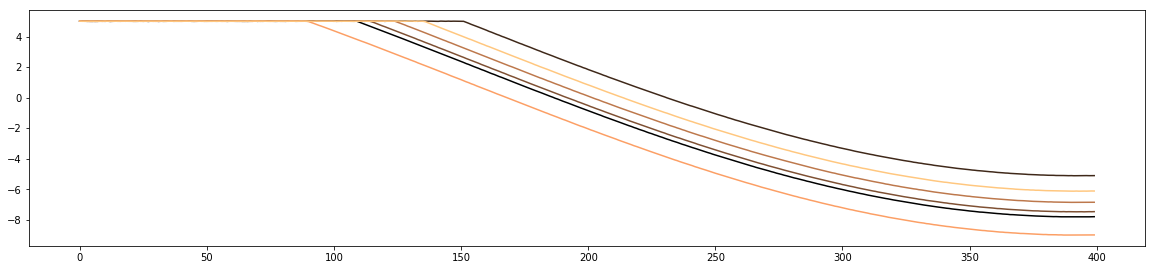

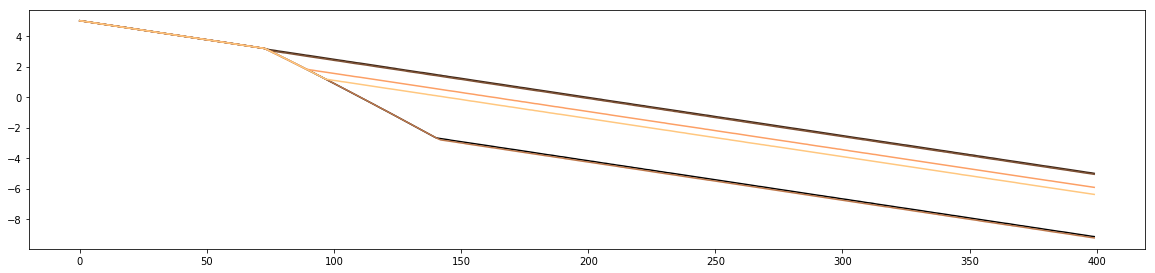

In [3]:
df.iloc[2000:2400, 1:-2].plot(legend=False, figsize=(20,10), cmap='copper').set_aspect(6) #each x-section is 400 points long 
df_onlap.iloc[2000:2400, 1:-2].plot(legend=False, figsize=(20,10), cmap='copper').set_aspect(6)
#df_horizontal.iloc[400:800, 0:-2].plot(legend=False, figsize=(20,10), cmap='copper').set_aspect(6)

## now let's grid the data using Verde and plot it up

Text(0.5,1,'Angular Unconformity Isochore')

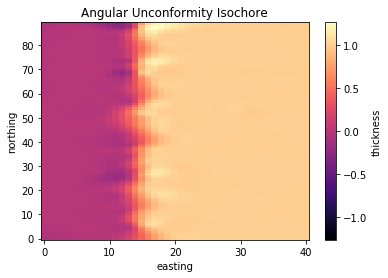

In [4]:
spline = vd.Spline()
spline.fit((df.iloc[2000:2400,-2], df.iloc[2000:2400,-1]), angular_thicknesses.iloc[2000:2400,5])
grid = spline.grid(spacing=1,data_names=["thickness"])
grid.thickness.plot.pcolormesh(cmap="magma")
plt.title('Angular Unconformity Isochore')

Text(0.5,1,'Angular Unconformity Structure')

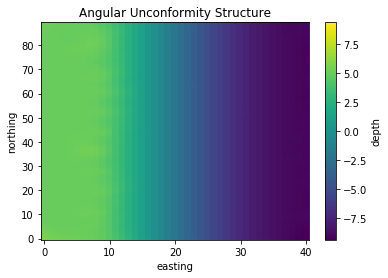

In [5]:
spline = vd.Spline()
spline.fit((df.iloc[2000:2400,-2], df.iloc[2000:2400,-1]), df.iloc[2000:2400,5])
grid = spline.grid(spacing=1,data_names=["depth"])
grid.depth.plot.pcolormesh(cmap="viridis")
plt.title('Angular Unconformity Structure')

Text(0.5,1,'Onlap Isochore')

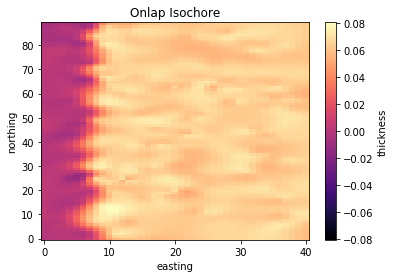

In [6]:
spline = vd.Spline()
spline.fit((df_onlap.iloc[2000:2400,-2], df_onlap.iloc[2000:2400,-1]), onlap_thicknesses.iloc[2000:2400,5])
grid = spline.grid(spacing=1,data_names=["thickness"])
grid.thickness.plot.pcolormesh(cmap="magma")
plt.title('Onlap Isochore')

Text(0.5,1,'Onlap Structure')

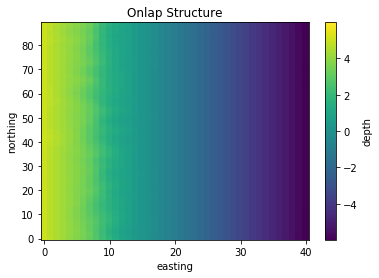

In [7]:
spline.fit((df_onlap.iloc[2000:2400,-2], df_onlap.iloc[2000:2400,-1]), df_onlap.iloc[2000:2400,5])
grid = spline.grid(spacing=1,data_names=["depth"])
grid.depth.plot.pcolormesh(cmap="viridis")
plt.title('Onlap Structure')

### we can decimate the data to see what it would look like with fewer 'wells' in the cross section

In [8]:
decimate_onl = df_onlap.iloc[2000:2400].sample(frac=0.01) #fraction is the percentage of the data you want to sample ie-0.9 means sample 90% of the data

Text(0.5,1,'A.')

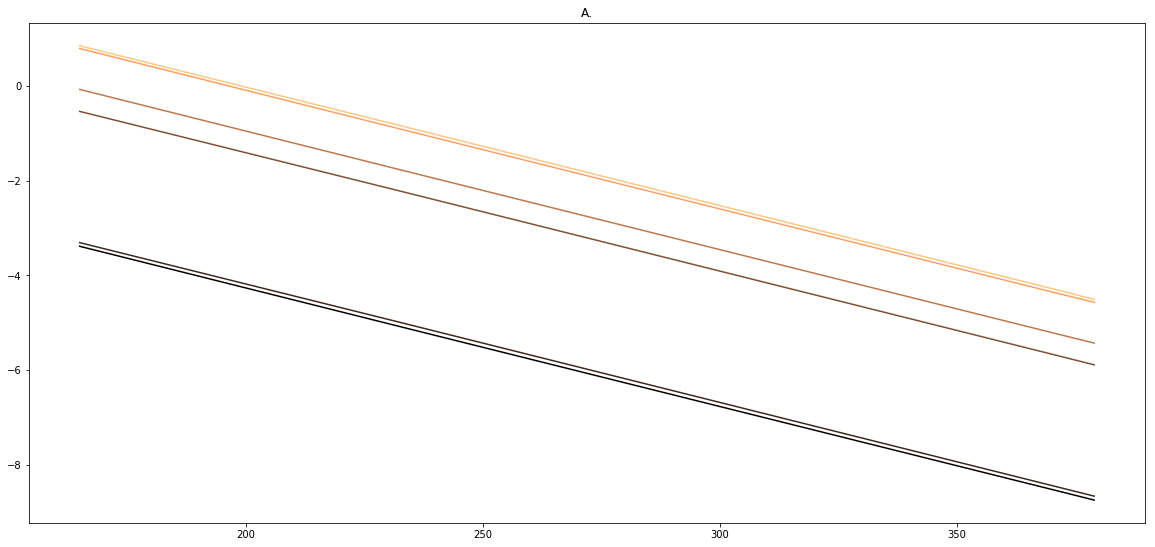

In [9]:
dec = []
for i in range(len(decimate_onl)):
    dec.append(decimate_onl.sort_index().iloc[i,1:-2].sort_values()[0:6].values)
s2 = pd.DataFrame(dec)
s2.index= decimate_onl.sort_index().index.values
s2.plot(legend=False, figsize=(20,10), cmap='copper').set_aspect(10)
plt.title('A.')

In [10]:
decimate_ang = df.iloc[2000:2400].loc[s2.diff(axis=1).index.values]

Text(0.5,1,'B.')

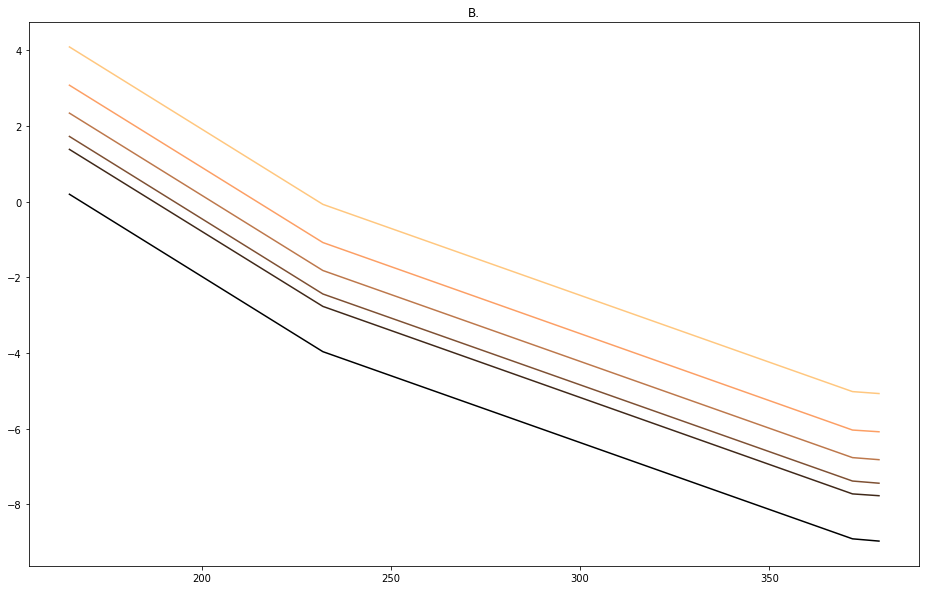

In [11]:
adec = []
for i in range(len(decimate_ang)):
    adec.append(decimate_ang.sort_index().iloc[i,1:-2].sort_values()[0:6].values)
s3 = pd.DataFrame(adec)
s3.index= decimate_ang.sort_index().index.values
s3.plot(legend=False, figsize=(20,10), cmap='copper').set_aspect(10)
plt.title('B.')